In [1]:
%matplotlib inline
from PIL import Image
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def display_image(image, gray=True):
    plt.figure(figsize=(12, 6))
    if gray == True:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.show()

In [3]:
def custom_barplot(height, title):
    x = np.arange(len(height))
    plt.bar(x, height=height)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [4]:
def get_sum(img):
    x_sum = np.sum(img, axis=0) / img.shape[1]
    y_sum = np.sum(img, axis=1) / img.shape[0]
    return x_sum, y_sum

In [5]:
def distrib(img):
    x_sum, y_sum = get_sum(img)
    custom_barplot(y_sum, "Distrib pixel axe Y")
    custom_barplot(x_sum, "Distrib pixel axe X")

In [6]:
def get_variation(array):
    bounds = []
    b1 = 0
    b2 = 0
    flag = True
    for i, pixel in enumerate(array):
        if pixel > 4:
            if flag == True:
                b1 = i
                flag = False
        if pixel < 5:
            if flag == False:
                b2 = i-1
                bounds.append((b1, b2))
                flag = True
    if b2 == 0 or b1 != bounds[-1][0]:
        bounds.append((b1, len(array)-1))
    return bounds

In [7]:
def is_close_gap(tuple1, tuple2, treshold=100):
    if tuple2[0] - tuple1[1] < treshold:
        return True
    else:
        return False

In [8]:
def get_boundaries(tuple_array):
    tmp = tuple_array[0]
    bound = []
    for i in range(len(tuple_array)):
        if i+1 == len(tuple_array):
            break
        if is_close_gap(tuple_array[i], tuple_array[i+1]):
            tmp = (tmp[0], tuple_array[i+1][1])
        else:
            bound.append(tmp)
            tmp = tuple_array[i+1]
    bound.append(tmp)
    return bound

In [9]:
def remove_small_bound(tuple_array, treshold=100):
    diff = tuple_array[0][1] - tuple_array[0][0]
    tmp = tuple_array[0]
    for item in tuple_array:
        if diff < item[1] - item[0]:
            tmp = item
            diff = item[1] - item[0]
    return tmp

In [10]:
def get_cni_without_background(img, padding=0, verbose=False):
    img_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    #if verbose: display_image(img_inv)
    x_sum, y_sum = get_sum(img_inv) # mean of each pixel by axis
    if verbose == True: print "X_SUM : {}  YSUM : {}".format(x_sum, y_sum)
    x_var = get_variation(x_sum) # get segments with spike on x axis
    if verbose == True: print "X_VAR : {}".format(x_var)
    y_var = get_variation(y_sum) # get segments with spike on y axis
    if verbose == True: print "Y_VAR : {}".format(y_var)
    x_bound = get_boundaries(x_var) # consolidate each segment
    if verbose == True: print "X_BOUND : {}".format(x_bound)
    y_bound = get_boundaries(y_var) # consolidate each segment
    if verbose == True: print "Y_BOUND : {}".format(y_bound)
    x_bound_final = remove_small_bound(x_bound)
    if verbose == True: print "X_BOUND_FINAL : {}".format(x_bound_final)
    y_bound_final = remove_small_bound(y_bound)
    if verbose == True: print "Y_BOUND_FINAL : {}".format(y_bound_final)
    cv2.rectangle(img, (x_bound_final[0] - padding, y_bound_final[0] - padding), (x_bound_final[1] + padding, y_bound_final[1] + padding), (0,255,0), 20)
    display_image(img)
    return img_inv, img

In [11]:
img = cv2.imread("./5.png", 0)

In [12]:
img_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

In [14]:
img = cv2.imread("./5.png", 0)

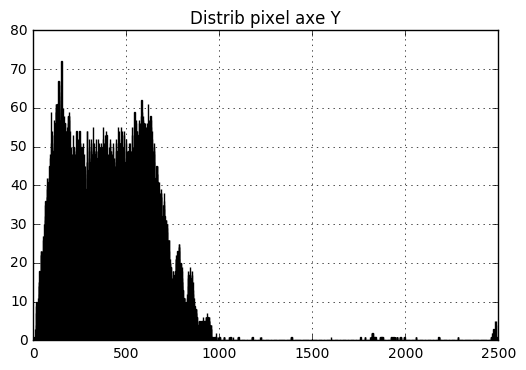

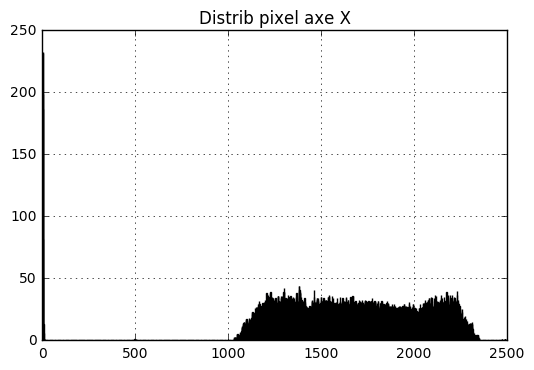

In [15]:
distrib(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2))

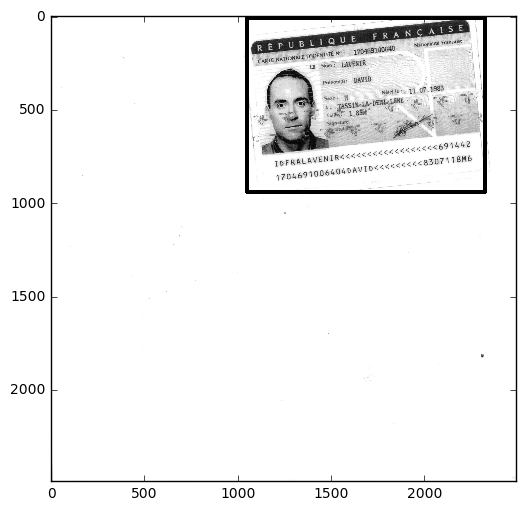

In [19]:
display_image(img)

In [17]:
ID = ["5.png"]

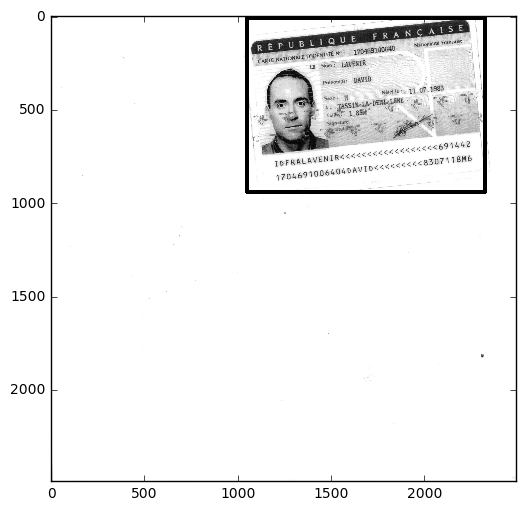

In [22]:
for id_img in ID:
    img = cv2.imread("./" + id_img, 0)
    _, _ = get_cni_without_background(img, verbose=False)

In [20]:
for i, path in enumerate(os.listdir("./")):
    print path
    if i == 50:
        break
    img = cv2.imread("./" + path, 0)
    _, _ = get_cni_without_background(img, verbose=False)

.gitignore


error: /home/cuong-nguyen/2016/Workspace/brexia/Octobre/CodeSource/opencv/modules/core/src/matrix.cpp:908: error: (-215) dims <= 2 && step[0] > 0 in function locateROI


In [23]:
img_inv = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)

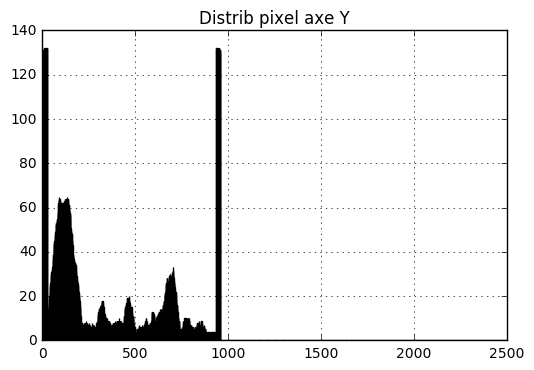

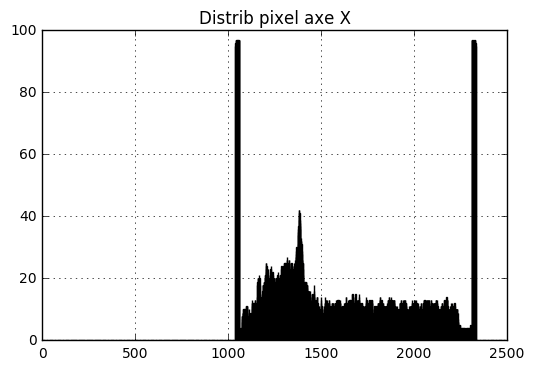

In [24]:
distrib(img_inv[1])

In [25]:
x_sum, y_sum = get_sum(img_inv[1])

In [104]:
x_bound = get_index_bound(x_sum)
y_bound = get_index_bound(y_sum)

In [105]:
x_bound

(543, 1936)

In [106]:
y_bound

(4, 3504)

In [111]:
x_sum

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

In [151]:
x_var = get_variation(x_sum)

In [152]:
x_var

[(540, 785),
 (789, 1520),
 (1527, 1550),
 (1554, 1556),
 (1560, 1583),
 (1587, 1610),
 (1617, 1643),
 (1653, 1655)]

In [153]:
y_var = get_variation(y_sum)

In [154]:
y_var

[(4, 9),
 (955, 1035),
 (1048, 1086),
 (1111, 1137),
 (1153, 1161),
 (1165, 1182),
 (1189, 1569),
 (1588, 1641),
 (1663, 1713)]

In [155]:
get_boundaries(x_var)

[(540, 1655)]

In [156]:
get_boundaries(y_var)

[(4, 9), (955, 1713)]

In [8]:
import re

In [9]:
re.search('{[A-Z0-9-]*}', "CNI/{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}.pdf-0.png").group(0)

'{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}'

In [113]:
get_white(x_sum)

[(0, 539),
 (786, 788),
 (1521, 1526),
 (1551, 1553),
 (1557, 1559),
 (1584, 1586),
 (1611, 1616),
 (1644, 1652)]

In [114]:
get_white(y_sum)

[(0, 3),
 (10, 954),
 (1036, 1047),
 (1087, 1110),
 (1138, 1152),
 (1162, 1164),
 (1183, 1188),
 (1570, 1587),
 (1642, 1662)]